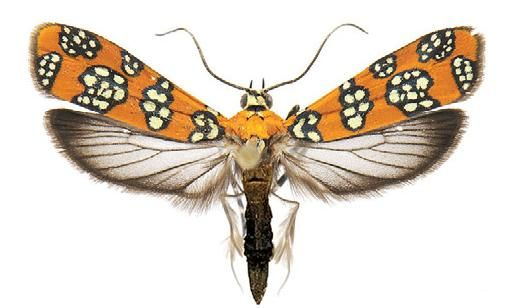

# Import the moths data from the .csv file

In [1]:
moths <- 
  read.csv("moths.csv",
   header=TRUE, sep=",", na.strings="NA", dec=".", strip.white=TRUE)
moths

region,site,area,ForstCover,Treediversity,Isolation,spp,lat,long
WAP,ClearCreek,289.0,84.9,5.59,6.89,85,39.593,-82.573
WAP,CraneHollow,180.9,82.2,8.61,6.80,81,39.630,-82.558
WAP,Phinney,93.5,84.3,6.84,6.70,96,39.558,-82.500
WAP,Rockbridge,89.8,38.3,5.09,6.34,47,39.575,-82.500
WAP,Wahkeena,72.8,53.4,2.25,6.38,65,39.635,-82.529
WAP,Klinger,22.6,29.3,7.06,6.03,66,39.587,-82.831
WAP,Fairview,6.9,12.5,3.94,5.43,43,39.525,-82.450
WAP,WindyHills,3.8,38.5,4.97,6.00,41,39.583,-82.533
WAP,RidgeLaurel,1.7,56.2,7.69,6.20,49,39.499,-82.573
NCT,Pater,230.6,37.1,9.01,6.21,90,39.433,-84.742


# Now, let's install some R packages that will be useful as we start to look at and analyze the data.

In [2]:
install.packages("primer", repos='http://cran.us.r-project.org', dependencies=TRUE)
install.packages("histogram", repos='http://cran.us.r-project.org', dependencies=TRUE)
install.packages("lattice", repos='http://cran.us.r-project.org', dependencies=TRUE)

library("primer")
library("histogram")
library("lattice")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘numDeriv’, ‘gtools’, ‘permute’, ‘deSolve’, ‘bbmle’, ‘gdata’, ‘vegan’

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependency ‘latticeExtra’

Loading required package: deSolve
Loading required package: lattice

Attaching package: ‘histogram’

The following object is masked from ‘package:lattice’:

    histogram



# The first thing we want to do is make sure that our response variable (moth species) is well-behaved. Does it have a normal distribution?

# To test this assumption, let's start by visualizing the distribution using a histogram...

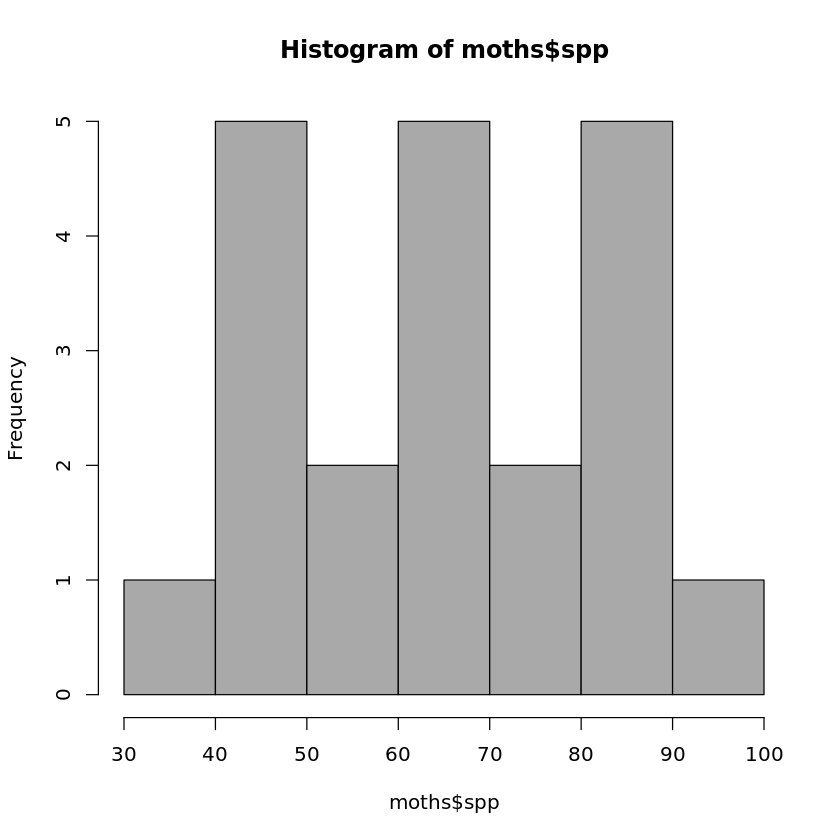

In [3]:
hist(moths$spp, col="darkgray")

# What are your thoughts about the distribution of our moths data from looking at the histogram?

# We can statistically test for normality using the Shapiro Test, which tests the null hypothesis that the sample being tested is normally distributed.

In [4]:
shapiro.test(moths$spp)


	Shapiro-Wilk normality test

data:  moths$spp
W = 0.96008, p-value = 0.5178


# How do we interpret this? If the p value is less than our significance level (p < 0.05), then we don't reject the null hypothesis. Our p-value here is 0.5178; this means that our sample follows a normal distribution.

# However, it is standard to look at the log distribution. Let's log transform the histogram and run the Shapiro Test again.

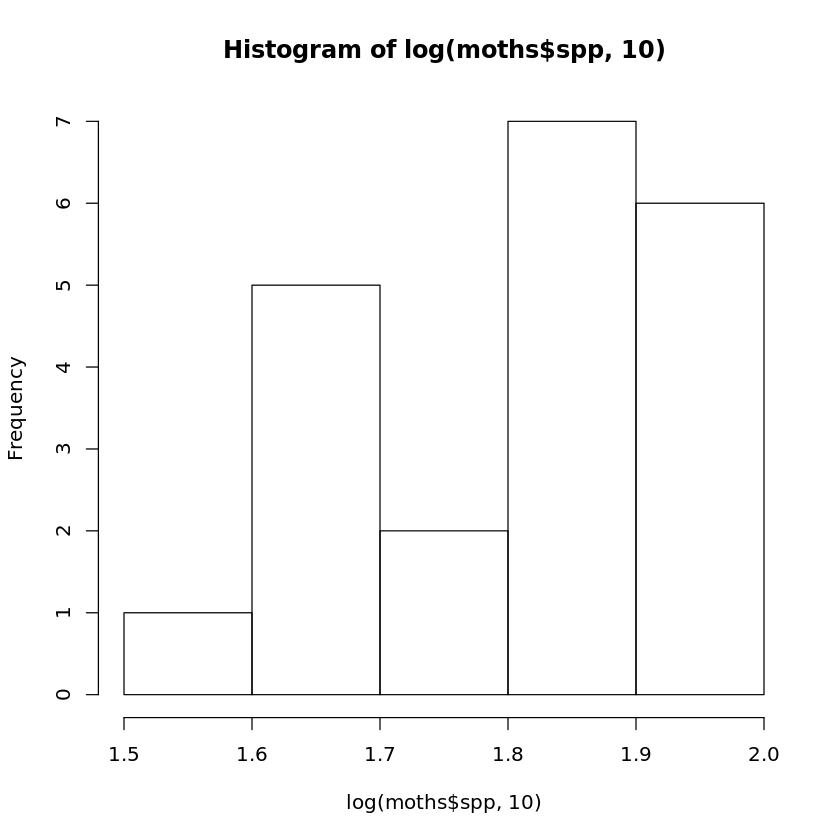

In [5]:
hist(log(moths$spp,10))

In [6]:
shapiro.test(log(moths$spp,10))


	Shapiro-Wilk normality test

data:  log(moths$spp, 10)
W = 0.94994, p-value = 0.3398


# Does the Shapiro Test still show our moth species data as being normally distributed?